<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html exercisesweek35.do.txt  -->
<!-- dom:TITLE: Exercises week 35 -->

# Exercises week 35
**August 26-30, 2024**

Date: **Deadline is Friday August 30 at midnight**

Contributors: Haseeb Iqbal, Mina Piasdatter Walderhaug, Sophia Gaupp

## Exercise 1: Analytical exercises

In this exercise we derive the expressions for various derivatives of
products of vectors and matrices. Such derivatives are central to the
optimization of various cost functions. Although we will often use
automatic differentiation in actual calculations, to be able to have
analytical expressions is extremely helpful in case we have simpler
derivatives as well as when we analyze various properties (like second
derivatives) of the chosen cost functions.  Vectors are always written
as boldfaced lower case letters and matrices as upper case boldfaced
letters. You will find useful the notes from week 35 on derivatives of vectors and matrices.
See also the textbook of Faisal at al, chapter 5 and in particular sections 5.3-5.5 at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/Textbooks/MathMLbook.pdf>

Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} = \boldsymbol{a}^T,
$$

Notice that here $b = a$ and $a = x$.

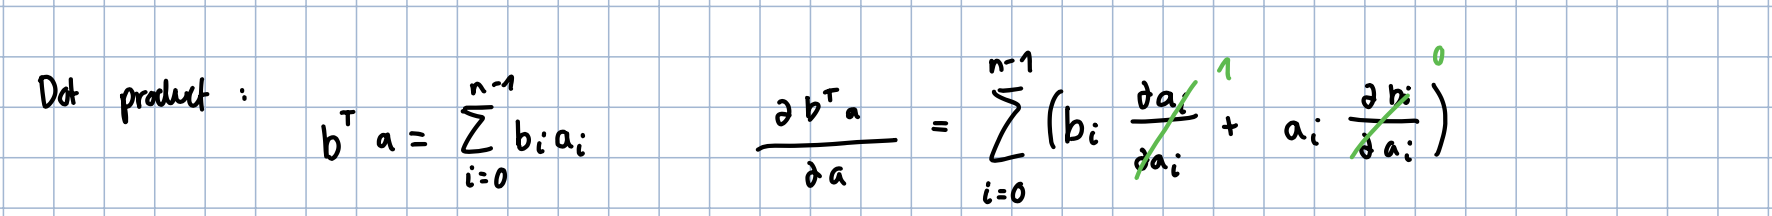   

and

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{a}^T(\boldsymbol{A}+\boldsymbol{A}^T),
$$

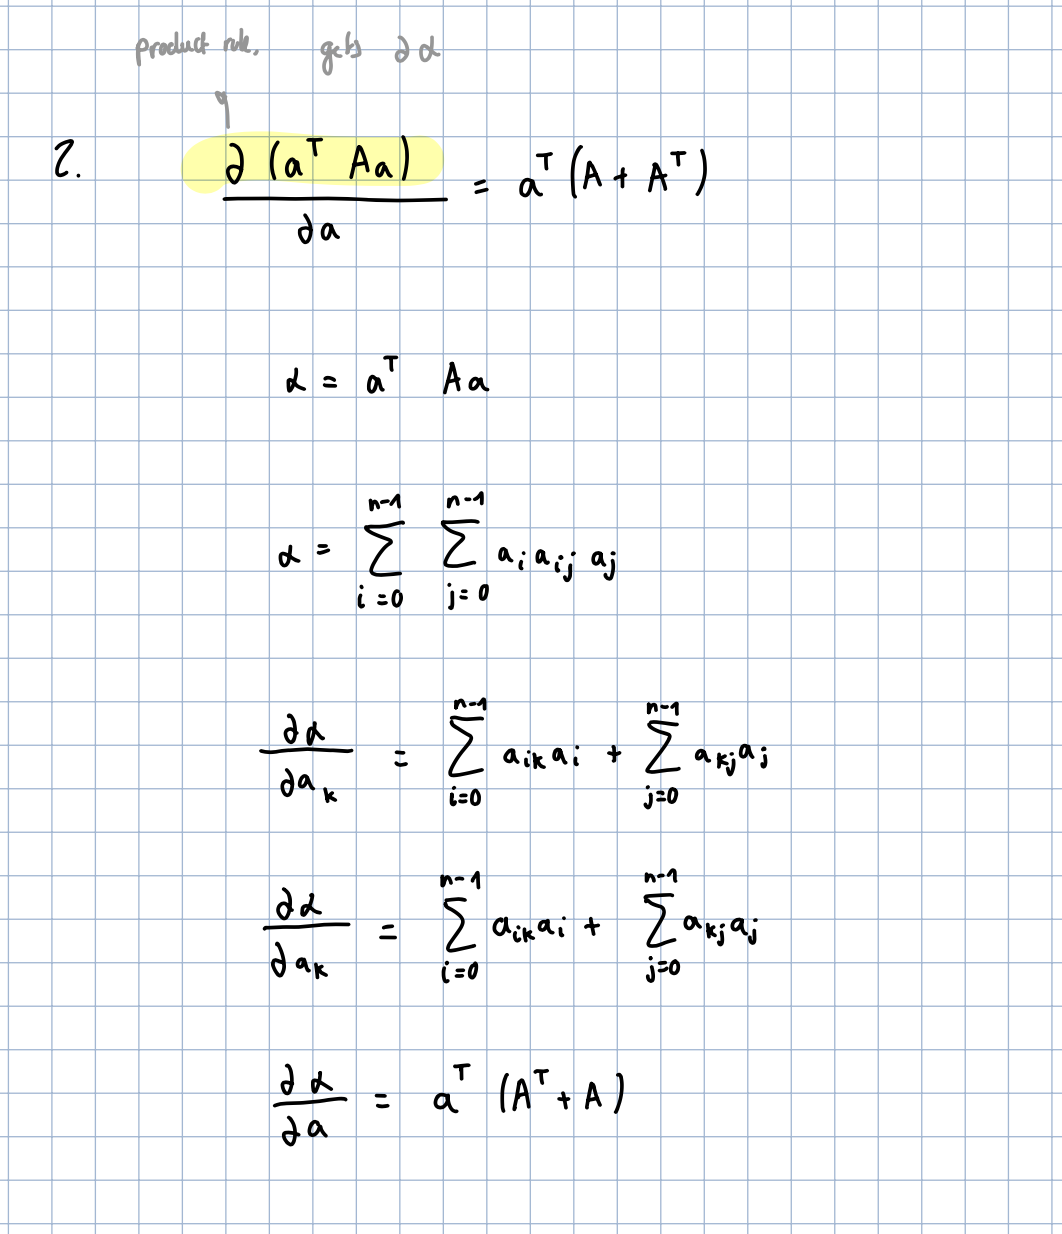

and

$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = -2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{A},
$$

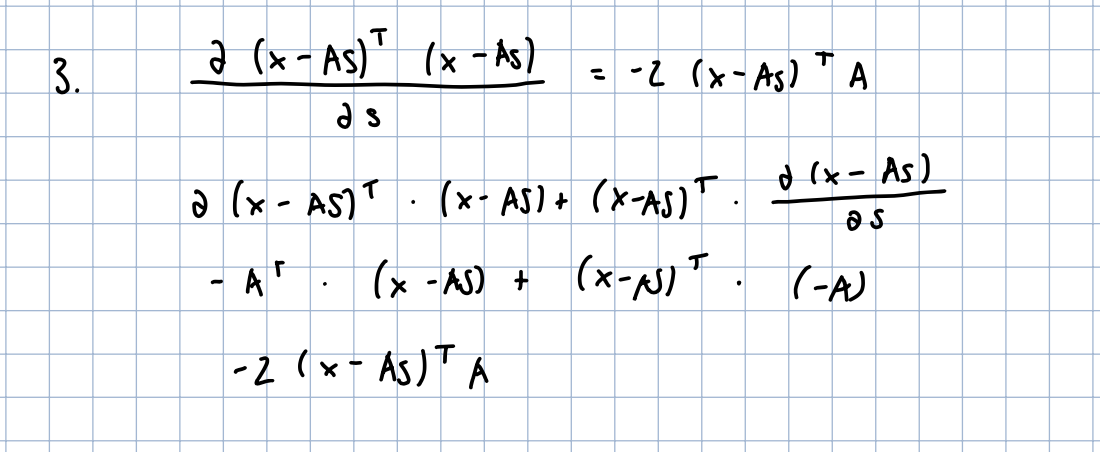

and finally find the second derivative of this function with respect to the vector $\boldsymbol{s}$. 


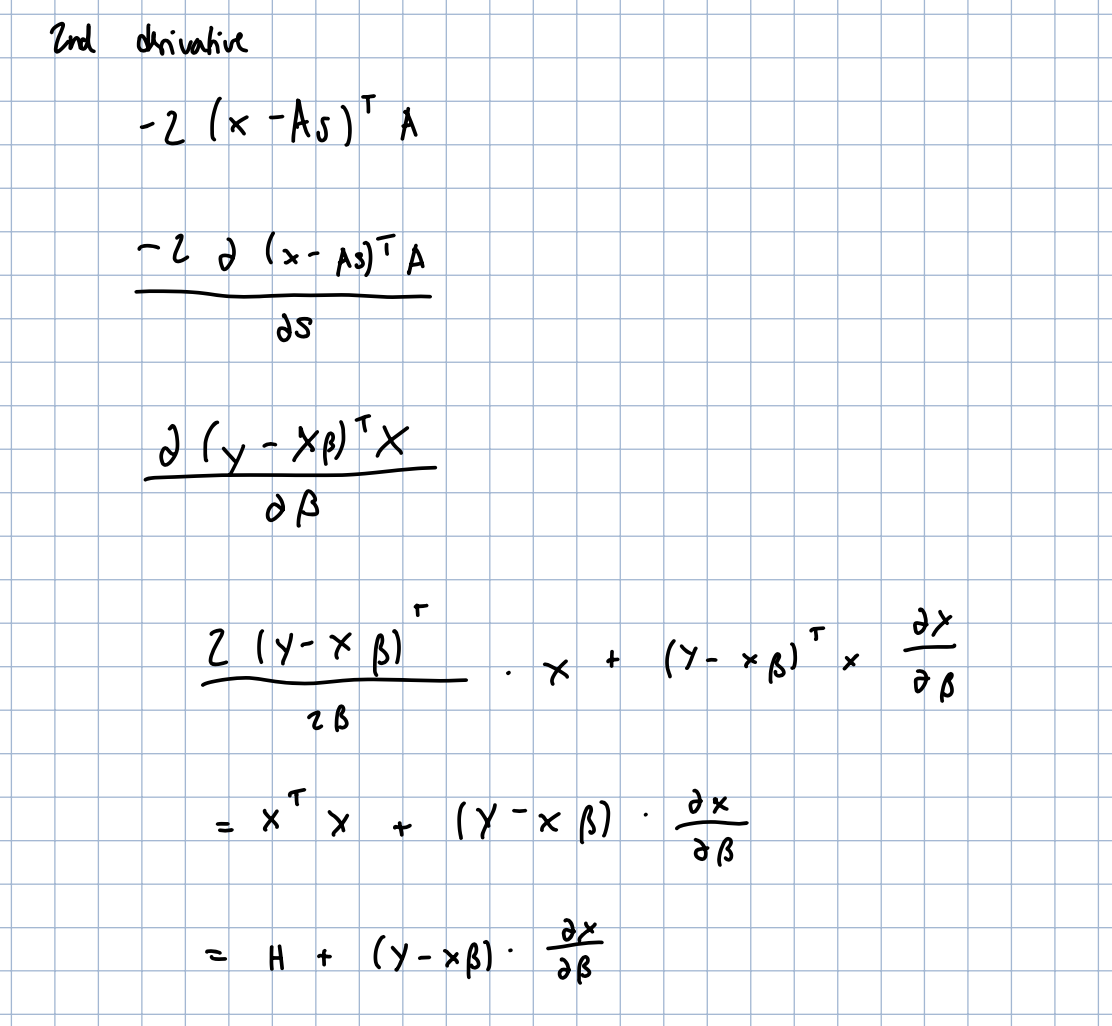


If we replace the vector $\boldsymbol{s}$ with the unknown parameters $\boldsymbol{\beta}$ used to define the ordinary least squares method, we end up with the equations that determine these parameters. The matrix $\boldsymbol{A}$ is then the design matrix $\boldsymbol{X}$ and $\boldsymbol{x}$ here has to be replaced with the outputs $\boldsymbol{y}$.

The second derivative of the mean squared error is then proportional to the so-called Hessian matrix $\boldsymbol{H}=\boldsymbol{X}^T\boldsymbol{X}$.

**Hint**: In these exercises it is always useful to write out with summation indices the various quantities. Take also a look at the weekly slides from week 35 and the various examples included there.

As an example, consider the function

$$
f(\boldsymbol{x}) =\boldsymbol{A}\boldsymbol{x},
$$

which reads for a specific component $f_i$ (we define the matrix $\boldsymbol{A}$ to have dimension $n\times n$ and the vector $\boldsymbol{x}$ to have length $n$)

$$
f_i =\sum_{j=0}^{n-1}a_{ij}x_j,
$$

which leads to

$$
\frac{\partial f_i}{\partial x_j}= a_{ij},
$$

and written out in terms of the vector $\boldsymbol{x}$ we have

$$
\frac{\partial f(\boldsymbol{x})}{\partial \boldsymbol{x}}= \boldsymbol{A}.
$$

## Exercise 2: making your own data and exploring scikit-learn

We will generate our own dataset for a function $y(x)$ where $x \in
[0,1]$ and defined by random numbers computed with the uniform
distribution. The function $y$ is a quadratic polynomial in $x$ with
added stochastic noise according to the normal distribution $\cal
{N}(0,1)$.  The following simple Python instructions define our $x$
and $y$ values (with 100 data points).

In [1]:
import numpy as np
x = np.random.rand(100,1)
y = 2.0+5*x*x+0.1*np.random.randn(100,1)

1. Write your own code (following the examples under the [regression notes](https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter1.html)) for computing the parametrization of the data set fitting a second-order polynomial. 


Fitted coefficients:
 a = 4.819, b = 0.168, c = 1.995


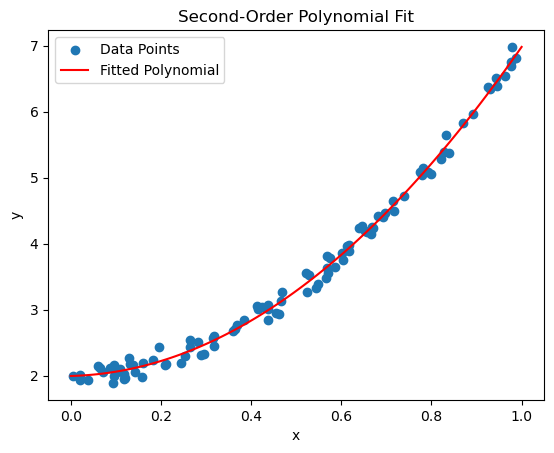

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate the synthetic dataset
np.random.seed(0)  # For reproducibility
x = np.random.rand(100, 1)
y = 2.0 + 5*x*x + 0.1*np.random.randn(100, 1)

# Step 2: Construct the design matrix for a second-order polynomial
# The design matrix A is constructed as follows:
# A = [x^2, x, 1]
X = np.hstack((x**2, x, np.ones_like(x)))

# Step 3: Compute the coefficients using the least squares method
# This can be done by solving the normal equation A.T @ A @ coeff = A.T @ y
# Alternatively, we can use np.linalg.lstsq to solve it directly
coefficients, _, _, _ = np.linalg.lstsq(X, y, rcond=None)

# The coefficients will correspond to [a, b, c] in the polynomial ax^2 + bx + c
a, b, c = coefficients.flatten()
print(f"Fitted coefficients:\n a = {a:.3f}, b = {b:.3f}, c = {c:.3f}")

# Step 4: Visualize the fit
# Generate a smooth curve for plotting
x_fit = np.linspace(0, 1, 100)
y_fit = a*x_fit**2 + b*x_fit + c

plt.scatter(x, y, label='Data Points')
plt.plot(x_fit, y_fit, color='red', label='Fitted Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Second-Order Polynomial Fit')
plt.legend()
plt.show()

2. Use thereafter **scikit-learn** (see again the examples in the slides for week 35) and compare with your own code. Note here that **scikit-learn** does not include, by default, the intercept. See the discussions on scaling your data in the slides for this week. This type of problems appear in particular if we fit a polynomial with an intercept. 


Manual Least Squares Coefficients:
 a = 4.8192, b = 0.1682, c = 1.9951

Scikit-learn Coefficients:
 a = 4.8192, b = 0.1682, c = 1.9951


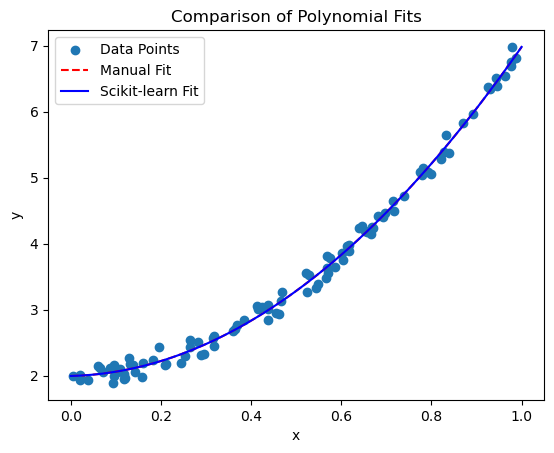

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Generate the synthetic dataset
np.random.seed(0)  # For reproducibility
x = np.random.rand(100, 1)
y = 2.0 + 5*x*x + 0.1*np.random.randn(100, 1)

# Step 2: Fit using manual least squares (as done previously)
# Construct the design matrix for a second-order polynomial
X_manual = np.hstack((x**2, x, np.ones_like(x)))

# Compute the coefficients using the least squares method
coefficients_manual, _, _, _ = np.linalg.lstsq(X_manual, y, rcond=None)
a_manual, b_manual, c_manual = coefficients_manual.flatten()

# Step 3: Fit using scikit-learn
# Construct the same design matrix
X_sklearn = np.hstack((x**2, x))

# Initialize the model
model = LinearRegression(fit_intercept=True)
# Fit the model
model.fit(X_sklearn, y)

# Extract coefficients
a_sklearn = model.coef_[0, 0]
b_sklearn = model.coef_[0, 1]
c_sklearn = model.intercept_[0]

# Step 4: Print and compare coefficients
print("Manual Least Squares Coefficients:")
print(f" a = {a_manual:.4f}, b = {b_manual:.4f}, c = {c_manual:.4f}")

print("\nScikit-learn Coefficients:")
print(f" a = {a_sklearn:.4f}, b = {b_sklearn:.4f}, c = {c_sklearn:.4f}")

# Step 5: Visualize the results
x_fit = np.linspace(0, 1, 100)
y_fit_manual = a_manual*x_fit**2 + b_manual*x_fit + c_manual
y_fit_sklearn = a_sklearn*x_fit**2 + b_sklearn*x_fit + c_sklearn

plt.scatter(x, y, label='Data Points')
plt.plot(x_fit, y_fit_manual, color='red', linestyle='--', label='Manual Fit')
plt.plot(x_fit, y_fit_sklearn, color='blue', label='Scikit-learn Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Polynomial Fits')
plt.legend()
plt.show()



3. Using scikit-learn, compute also the mean squared error, a risk metric corresponding to the expected value of the squared (quadratic) error defined as

$$
MSE(\boldsymbol{y},\boldsymbol{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

and the $R^2$ score function.
If $\tilde{\boldsymbol{y}}_i$ is the predicted value of the $i-th$ sample and $y_i$ is the corresponding true value, then the score $R^2$ is defined as

$$
R^2(\boldsymbol{y}, \tilde{\boldsymbol{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\boldsymbol{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

You can use the functionality included in scikit-learn. If you feel for it, you can use your own program and define functions which compute the above two functions. 
Discuss the meaning of these results. Try also to vary the coefficient in front of the added stochastic noise term and discuss the quality of the fits.

## Exercise 3: Split data in test and training data

In this exercise we want you to to compute the MSE for the training
data and the test data as function of the complexity of a polynomial,
that is the degree of a given polynomial.  

The aim is to reproduce Figure 2.11 of [Hastie et al](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf).
Feel free to read the discussions leading to figure 2.11 of Hastie et al. 

Our data is defined by $x\in [-3,3]$ with a total of for example $n=100$ data points. You should try to vary the number of data points $n$ in your analysis.

In [4]:
np.random.seed()
n = 100
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

where $y$ is the function we want to fit with a given polynomial.

**a)**
Write a first code which sets up a design matrix $X$ defined by a fifth-order polynomial and split your data set in training and test data.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

np.random.seed()

n = 100
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

# Design matrix as a function of a fifth-order polynomial
X = np.zeros((len(x), 6))
X[:, 0] = 1.0          # x^0 (intercept term)
X[:, 1] = x[:, 0]      # x^1
X[:, 2] = x[:, 0]**2   # x^2
X[:, 3] = x[:, 0]**3   # x^3
X[:, 4] = x[:, 0]**4   # x^4
X[:, 5] = x[:, 0]**5   # x^5

# We split the data into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


**b)**
Write thereafter (using either **scikit-learn** or your matrix inversion code using for example **numpy**)
and perform an ordinary least squares fitting and compute the mean squared error for the training data and the test data. These calculations should apply to a model given by a fifth-order polynomial.  If you compare your own code with _scikit_learn_, not that the latter does not include by default the intercept. See the discussions on scaling your data in the slides for this week.

In [6]:
# matrix inversion to find beta
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print(beta)
# and then make the prediction
ytilde = X_train @ beta
print("Training R2")
print(R2(y_train,ytilde))
print("Training MSE")
print(MSE(y_train,ytilde))
ypredict = X_test @ beta
print("Test R2")
print(R2(y_test,ypredict))
print("Test MSE")
print(MSE(y_test,ypredict))

[[ 8.72108196e-01]
 [ 2.48098955e-01]
 [-5.53081834e-02]
 [ 5.43639129e-02]
 [ 4.99210013e-04]
 [-8.54214409e-03]]
Training R2
0.8992882854487465
Training MSE
0.02310079062318114
Test R2
0.9342413659724897
Test MSE
0.023477687498473884


**c)**
Add now a model which allows you to make polynomials up to degree $15$.  Perform a standard OLS fitting of the training data and compute the MSE for the training and test data and plot both test and training data MSE as functions of the polynomial degree. Compare what you see with Figure 2.11 of Hastie et al. Comment your results. For which polynomial degree do you find an optimal MSE (smallest value)?

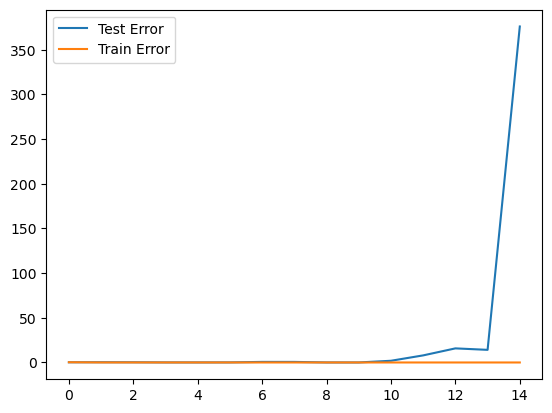

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

np.random.seed(2018)
n = 50
maxdegree = 15

# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, x.shape)

TestError = np.zeros(maxdegree)
TrainError = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    clf = model.fit(x_train_scaled, y_train)
    y_fit = clf.predict(x_train_scaled)
    y_pred = clf.predict(x_test_scaled) 
    polydegree[degree] = degree
    TestError[degree] = np.mean((y_test - y_pred)**2)
    TrainError[degree] = np.mean((y_train - y_fit)**2)

plt.plot(polydegree, TestError, label='Test Error')
plt.plot(polydegree, TrainError, label='Train Error')
plt.legend()
plt.show()


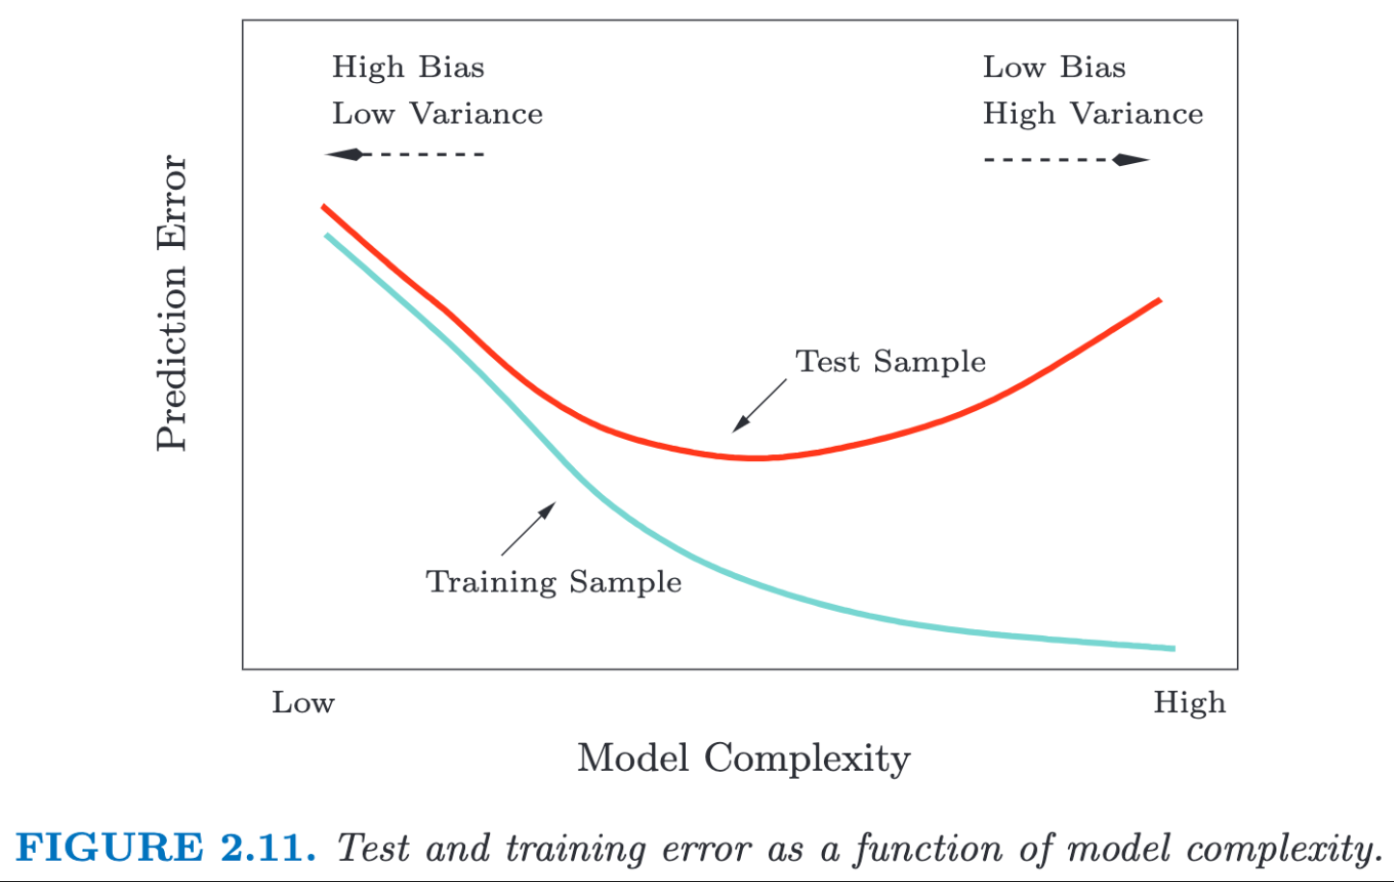

Comparing the above diagram with the one from Hastie et al. we can see differences. The trend visible in our own diagram is very much dependent on the maximal degree of the polynomial. For e.g. a maximal degree of 3 we can see a similar trend with a MSE of the train Error decreasing and the MSE of Test Error still being pretty high. The more complex the model (higher polynomial degree) the lower the Train Error will be. For very large polynomial degrees the Test Error increases drastically. 